## Project 4   Hack-a-thon

### Problem Statement:


In [1]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./data/cheap_train_sample.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 712.5+ KB


In [4]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

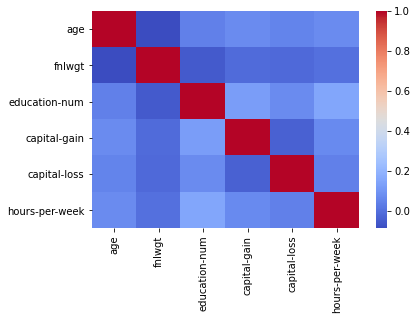

In [5]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [6]:
#clean object features to be numeric.
#alot of features for a limited amount of unique data points.
df.workclass.value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Never-worked           2
 Without-pay            2
Name: workclass, dtype: int64

In [7]:
# good spread of values representing the data, however will use entire feature allotment.
#Already have numerical column
df.education.value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [8]:
df['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [9]:
df['occupation'].value_counts()

 Exec-managerial      853
 Prof-specialty       840
 Craft-repair         831
 Adm-clerical         761
 Other-service        684
 Sales                681
 Machine-op-inspct    377
 ?                    365
 Transport-moving     320
 Handlers-cleaners    268
 Farming-fishing      184
 Tech-support         182
 Protective-serv      129
 Priv-house-serv       36
 Armed-Forces           2
Name: occupation, dtype: int64

In [10]:
df['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [11]:
df['sex'].value_counts()

 Male      4326
 Female    2187
Name: sex, dtype: int64

In [12]:
df['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
 ?                              120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 Jamaica                         18
 South                           18
 India                           17
 China                           17
 Puerto-Rico                     17
 Cuba                            16
 England                         16
 Italy                           15
 Poland                          14
 Japan                           12
 Columbia                        11
 Haiti                           11
 Guatemala                       11
 Taiwan                          10
 Iran                            10
 Peru                             9
 France                           9
 Vietnam                          8
 Nicaragua                        6
 Cambodia                   

In [13]:
df = pd.get_dummies(df, columns=['occupation','relationship', 'sex', 'marital-status', 'workclass', 'native-country'],
                    drop_first=True)

In [14]:
df.wage.value_counts()
#below or equal to 50k will be true.

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [15]:
df['wage'] = [1 if wage == ' <=50K' else 0 for wage in df.wage]

In [16]:
df.wage.value_counts()

1    4945
0    1568
Name: wage, dtype: int64

In [17]:
X = df.drop(columns=['wage', 'education'])
features = X.columns
y = df['wage']

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=420)

In [18]:
#Baseline score

guess = [1 if pred == 1 else 0 for pred in y]
sum(guess)/len(guess)

0.7592507293106096

In [19]:
rfc = RandomForestClassifier()

cross_val_score(rfc, X,y, cv=5).mean()

0.846612979853888

In [20]:
svc = SVC()
cross_val_score(svc,X,y,cv= 5).mean()

KeyboardInterrupt: 

In [ ]:
boost = AdaBoostClassifier()

cross_val_score(boost,X,y,cv=5).mean()

In [ ]:
logr= LogisticRegression()
cross_val_score(logr,X,y,cv=5).mean()

In [ ]:
tree = DecisionTreeClassifier()
cross_val_score(tree, X,y,cv=5).mean()

In [ ]:
x_trees = ExtraTreeClassifier()
cross_val_score(x_trees, X,y,cv= 5).mean()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))

In [ ]:
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

In [ ]:
boost = AdaBoostClassifier()
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values

feat.sort_values(by= 'values', ascending=False).tail(20)
boost.estimators_

In [ ]:
#weight features and adjust hyperparameters.
#what if for feature with an importance below .1  we multiply the
estimators = np.random.randint(10,300,90)
params = dict(n_estimators= estimators)

grid = GridSearchCV(AdaBoostClassifier(), param_grid=params, n_jobs=-1, cv= 5)
grid.fit(X_train,y_train)
print(f'Training Score: ', grid.score(X_train,y_train))
print(f'Validation Score: ', grid.score(X_val,y_val))
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
l_rate = np.logspace(-2,0,10)
estimators = np.random.randint(100,200,5)
criterion = ('friedman_mse', 'mse', 'mae')
max_features = (None, 'sqrt', 'log2')
params = dict(n_estimators= estimators,
              learning_rate= l_rate,
              criterion= criterion,
              max_features= max_features)